# Function approximation with a deep neural network

## Quartic function and training dataset

In algebra, a quartic function is a function of the form
$$
f(t)=at^{4}+bt^{3}+ct^{2}+dt+e,
$$
where $a$ is nonzero, which is defined by a polynomial of degree four, called a quartic polynomial.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch


Define and plot a quartic function

In [2]:
D_in = 1
D_out = 1

# Create random Tensors to hold inputs and outputs
x = torch.arange(-9,3.5,0.1).view(-1,1) #(-5,3.5,0.1)
y = x**4 + 2*x**3 - 12*x**2 -2*x + 6
y = torch.where(x < -5, torch.zeros_like(x), y)
N = x.shape[0]

In [3]:
print(x.size())
print(y.size())


torch.Size([125, 1])
torch.Size([125, 1])


Converting Torch Tensor to NumPy Array for plotting the function

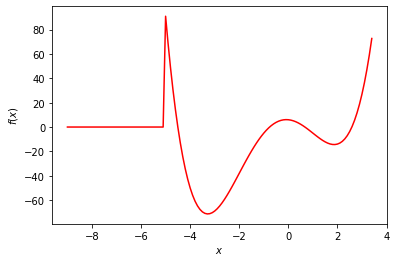

In [4]:
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

## Approximation with a deep neural network

### Question: code a deep neural network to approximate the function. The network will have 3 full-connected layers (followed by a ReLU activation function) and a final full-connected layer without any activation function. You will use the Adam optimizer. Choose the most appropriate loss function. You must compute the loss at each epoch.

In [5]:
import torch

H1 = 40 # number of hidden neurons
H2 = 20
H3 = 20

Niter = 5*10**3

import numpy as np
saveLoss = np.zeros(Niter)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, H3),
    torch.nn.ReLU(),
    torch.nn.Linear(H3, D_out)
)
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(Niter):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    saveLoss[t] = loss.detach().numpy()
    if t % 1000 == 999:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    


999 3.969116449356079
1999 0.08493132144212723
2999 0.059534814208745956
3999 15.484994888305664
4999 0.5833306312561035


Plot the training error as a function of the epoch

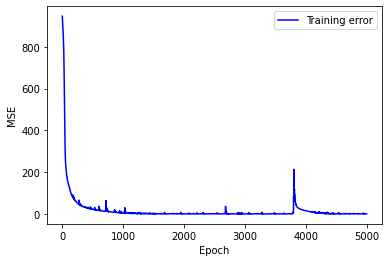

In [6]:
fig, ax = plt.subplots()
plt.plot(range(Niter),saveLoss,'b-',label='Training error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
ax.legend()
plt.show()

### Question: plot on the same graph the quartic function and its approximation

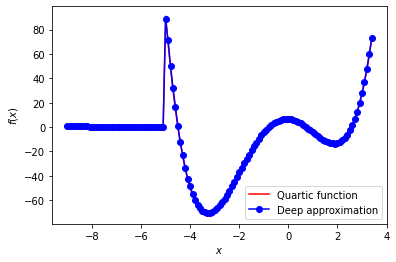

In [7]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

How many parameters?

In [8]:
# Function to count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [9]:
print(model.parameters)
print("\nTotal number of parameters {}\n".format(count_parameters(model)))

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
)>

Total number of parameters 1341



Print all the parameters (just for seeing them)

In [10]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[ 0.4044],
        [ 0.3168],
        [-0.2697],
        [-0.0614],
        [ 0.5901],
        [ 0.1082],
        [ 1.2599],
        [ 0.3693],
        [ 0.2400],
        [ 1.2503],
        [ 1.0243],
        [ 0.9856],
        [-0.9279],
        [-0.8697],
        [-0.2624],
        [ 0.0176],
        [ 0.9472],
        [-0.6267],
        [-0.5809],
        [-0.7849],
        [ 0.4877],
        [ 0.4657],
        [-0.3460],
        [-0.5130],
        [ 1.2678],
        [-0.5671],
        [-0.6680],
        [-0.7266],
        [-0.7576],
        [ 0.9431],
        [ 1.6466],
        [-0.4734],
        [-0.6232],
        [-0.7497],
        [ 0.0021],
        [-0.5098],
        [ 0.1381],
        [ 1.3019],
        [-0.6838],
        [ 0.3604]], requires_grad=True)
Parameter containing:
tensor([ 2.2301,  1.7791, -0.1089, -0.9311, -1.1476,  1.3743, -0.3387,  2.0651,
        -0.8495, -0.6752,  0.0747, -0.6569, -0.5956, -0.9145,  1.9020, -0.5334,
        -1.4554

## Approximation with a shallow neural network

### Question: code a one-hidden layer neural network with approximatively the same number of parameters than the multilayer neural network. What is the "best" architecture?

In [11]:
H1 = 5000 # number of hidden neurons

Niter = 20*10**3

import numpy as np
saveLoss = np.zeros(Niter)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, D_out)
)
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(Niter):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    saveLoss[t] = loss.detach().numpy()
    if t % 1000 == 999:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    



999 92.87301635742188
1999 72.88421630859375
2999 60.55171203613281
3999 54.13909149169922
4999 48.88675308227539
5999 39.426368713378906
6999 33.09257507324219
7999 33.30565643310547
8999 26.893747329711914
9999 25.26910400390625
10999 23.10966682434082
11999 21.53805160522461
12999 20.52692222595215
13999 18.235563278198242
14999 17.663326263427734
15999 17.02630615234375
16999 15.694245338439941
17999 15.07082462310791
18999 14.394712448120117
19999 14.144463539123535


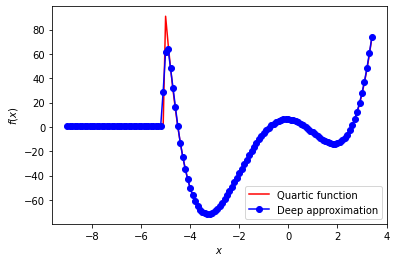

In [12]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

In [13]:
print("\nTotal number of parameters {}\n".format(count_parameters(model)))


Total number of parameters 15001

